In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data = pd.read_csv("Q10_Data.csv", names=['sample', 'w1x1', 'w1x2', 'w1x3', 'w2x1', 'w2x2', 'w2x3', 'w3x1', 'w3x2', 'w3x3' ]) 
data = data.drop([0,1])
Prior = [1/2, 1/2, 0]


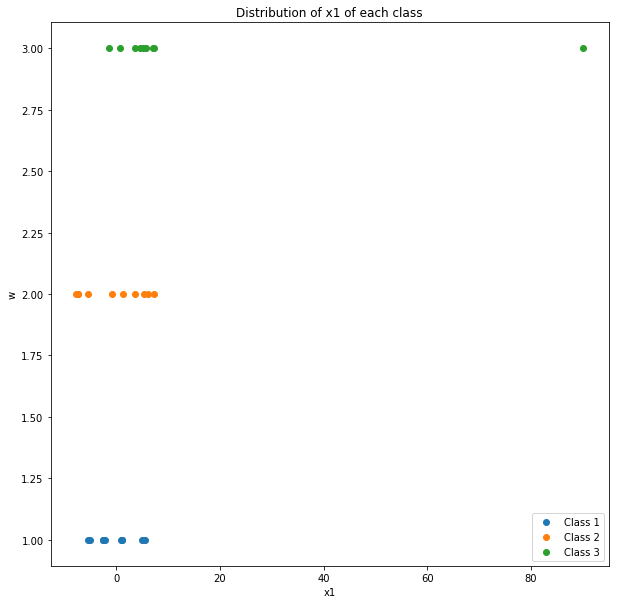

In [4]:
plt.figure(figsize=(10, 10))
plt.title("Distribution of x1 of each class")
plt.xlabel('x1')
plt.ylabel("w")
for i in range(3):
    plt.scatter(data["w"+str(i+1)+"x1"], [i+1]*10, label="Class "+str(i+1))
plt.legend()
plt.show()

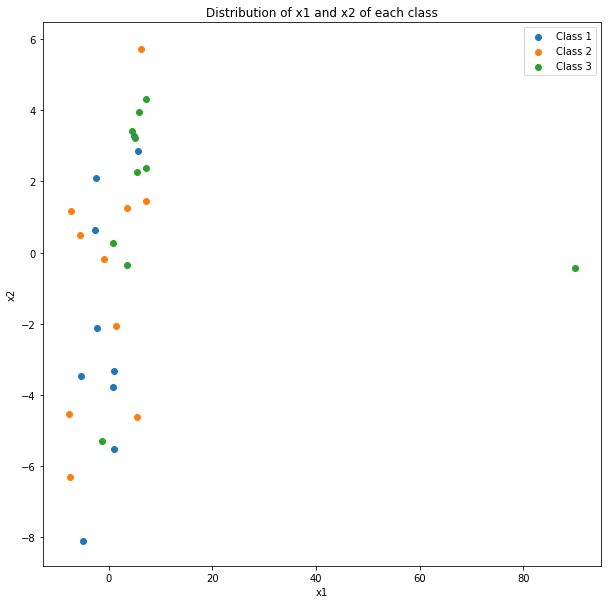

In [5]:
plt.figure(figsize=(10, 10))
plt.title("Distribution of x1 and x2 of each class")
plt.xlabel('x1')
plt.ylabel("x2")
for i in range(3):
    plt.scatter(data["w"+str(i+1)+"x1"], data["w"+str(i+1)+"x2"], label="Class "+str(i+1))
plt.legend()
plt.show()


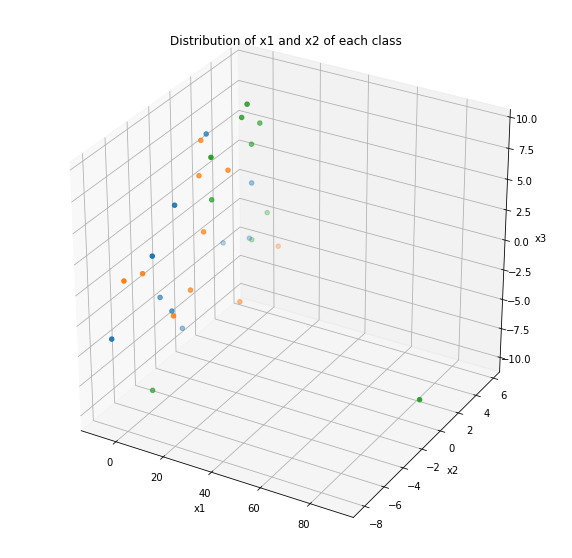

In [6]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
ax.set_title("Distribution of x1 and x2 of each class")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("x3")
for i in range(3):
    ax.scatter(data["w"+str(i+1)+"x1"], data["w"+str(i+1)+"x2"], data["w"+str(i+1)+"x3"], label="Class "+str(i+1))


As mentioned in the question, $P(W_1) = P(W_2) = \frac{1}{2} , P(W_3) = 0$

So there's no chanse that a sample is classified as third class.

If we choose Normal dist. as the likelihood dits., then we have

$g_i(x) = -\frac{1}{2}(x - \mu_i)^t\Sigma_i^{-1}(x - \mu_i) - \frac{d}{2}\ln 2 \pi$
$- \frac{1}{2}\ln|\Sigma_i| + \ln P(w_i)$

We will drop terms independent of i, so we have

$g_i(x) = -(x - \mu_i)^t\Sigma_i^{-1}(x - \mu_i)- \ln|\Sigma_i| + 2 \ln P(w_i)$


In [7]:
def predict(x, Sigma, means):
    g = []
    for i in range(3):
        gi = -(x - means[i]).T @ np.linalg.inv(Sigma[i]) @ (x - means[i])
        gi += - np.log(np.linalg.det(Sigma[i]))+ 2*np.log(Prior[i])
        g.append(gi) 
    return np.argmax(g)

In [18]:
confusion_matrix = np.zeros((3,3)) #rows: actual class, cols: predicted class
Sigma = []
means = []
for j in "123":
    Sigma.append(data[["w"+j+"x1"]].cov().values)
    means.append(data[["w"+j+"x1"]].mean().values)
for i in range(3):
    for x in data[["w"+str(i+1)+"x1"]].values:
        confusion_matrix[i][predict(x, Sigma, means)] += 1
print("CCR is ", np.array(confusion_matrix).diagonal().sum()/20)
print("ETE is ", 1 - np.array(confusion_matrix).diagonal().sum()/20)
print("Confusion Matrix:")
print(confusion_matrix)

CCR is  0.7
ETE is  0.30000000000000004
Confusion Matrix:
[[7. 3. 0.]
 [3. 7. 0.]
 [3. 7. 0.]]


/home/diyar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [19]:
confusion_matrix = np.zeros((3,3)) #rows: actual class, cols: predicted class
Sigma = []
means = []
for j in "123":
    Sigma.append(data[["w"+j+"x1", "w"+j+"x2"]].cov().values)
    means.append(data[["w"+j+"x1", "w"+j+"x2"]].mean().values)
for i in range(3):
    for x in data[["w"+str(i+1)+"x1", "w"+str(i+1)+"x2"]].values:
        confusion_matrix[i][predict(x, Sigma, means)] += 1
print("CCR is ", np.array(confusion_matrix).diagonal().sum()/20)
print("ETE is ", 1 - np.array(confusion_matrix).diagonal().sum()/20)
print("Confusion Matrix:")
print(confusion_matrix)

CCR is  0.55
ETE is  0.44999999999999996
Confusion Matrix:
[[5. 5. 0.]
 [4. 6. 0.]
 [4. 6. 0.]]


/home/diyar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [20]:
confusion_matrix = np.zeros((3,3)) #rows: actual class, cols: predicted class
Sigma = []
means = []
for j in "123":
    Sigma.append(data[["w"+j+"x1", "w"+j+"x3"]].cov().values)
    means.append(data[["w"+j+"x1", "w"+j+"x3"]].mean().values)
for i in range(3):
    for x in data[["w"+str(i+1)+"x1", "w"+str(i+1)+"x3"]].values:
        confusion_matrix[i][predict(x, Sigma, means)] += 1
print("CCR is ", np.array(confusion_matrix).diagonal().sum()/20)
print("ETE is ", 1 - np.array(confusion_matrix).diagonal().sum()/20)
print("Confusion Matrix:")
print(confusion_matrix)

CCR is  0.8
ETE is  0.19999999999999996
Confusion Matrix:
[[9. 1. 0.]
 [3. 7. 0.]
 [7. 3. 0.]]


/home/diyar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [21]:
confusion_matrix = np.zeros((3,3)) #rows: actual class, cols: predicted class
Sigma = []
means = []
for j in "123":
    Sigma.append(data[["w"+j+"x2", "w"+j+"x3"]].cov().values)
    means.append(data[["w"+j+"x2", "w"+j+"x3"]].mean().values)
for i in range(3):
    for x in data[["w"+str(i+1)+"x2", "w"+str(i+1)+"x3"]].values:
        confusion_matrix[i][predict(x, Sigma, means)] += 1
print("CCR is ", np.array(confusion_matrix).diagonal().sum()/20)
print("ETE is ", 1 - np.array(confusion_matrix).diagonal().sum()/20)
print("Confusion Matrix:")
print(confusion_matrix)


CCR is  0.55
ETE is  0.44999999999999996
Confusion Matrix:
[[5. 5. 0.]
 [4. 6. 0.]
 [4. 6. 0.]]


/home/diyar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [22]:
confusion_matrix = np.zeros((3,3)) #rows: actual class, cols: predicted class
Sigma = []
means = []
for j in "123":
    Sigma.append(data[["w"+j+"x1", "w"+j+"x2", "w"+j+"x3"]].cov().values)
    means.append(data[["w"+j+"x1", "w"+j+"x2", "w"+j+"x3"]].mean().values)
for i in range(3):
    t = 0
    for x in data[["w"+str(i+1)+"x1", "w"+str(i+1)+"x2", "w"+str(i+1)+"x3"]].values:
        confusion_matrix[i][predict(x, Sigma, means)] += 1
print("CCR is ", np.array(confusion_matrix).diagonal().sum()/20)
print("ETE is ", 1 - np.array(confusion_matrix).diagonal().sum()/20)
print("Confusion Matrix:")
print(confusion_matrix)

CCR is  0.85
ETE is  0.15000000000000002
Confusion Matrix:
[[8. 2. 0.]
 [1. 9. 0.]
 [7. 3. 0.]]


/home/diyar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


as you can see impirical training error almost reduces when the size of features grows.
however it depends on the model we choose, for example in more complex models, when we have only one feature the model can easily fir the data and have a really low ETE and as the number of features grows, it gets harder to fit all the training data and thus ETE increases.